In [1]:
# Imports

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

news_df = pd.read_csv('data_collection/data/news/tsv/AMZN.tsv', sep='\t')
trades_df = pd.read_csv('data_collection/data/trades/tsv/AMZN.tsv', sep='\t')

# Merge the two dataframes based on the 'date' in trades_df and 'published_utc' in news_df
news_df['date'] = news_df['published_utc'].str[:10]  # Extract the date part from 'published_utc'
df = pd.merge(news_df, trades_df, on='date', how='inner')
df

,ticker_x,published_utc,publisher,title,sentiment,sentiment_reasoning,date,ticker_y,open,high,low,close,volume,volume_weighted,trades
0,AMZN,2024-07-02T17:46:57Z,GlobeNewswire Inc.,No-Code AI Platform Market Is Expected To Reac...,positive,AWS is mentioned as one of the biggest names i...,2024-07-02,AMZN,197.28,200.43,195.93,200.00,45586383.0,198.7856,485434
1,AMZN,2024-07-02T19:16:19Z,Benzinga,"Apple, Microsoft, Amazon Shares Soar To New Al...",positive,Investors are starting to understand Amazon's ...,2024-07-02,AMZN,197.28,200.43,195.93,200.00,45586383.0,198.7856,485434
2,AMZN,2024-07-02T20:14:53Z,Benzinga,July Retail Promotions Historically Boost Stoc...,positive,"Amazon, which offers Prime Day sales in mid-Ju...",2024-07-02,AMZN,197.28,200.43,195.93,200.00,45586383.0,198.7856,485434
3,AMZN,2024-07-02T20:15:43Z,Benzinga,"Nasdaq 100 Notches Record Daily Close, Boosted...",positive,Amazon's stock price reached a fresh all-time ...,2024-07-02,AMZN,197.28,200.43,195.93,200.00,45586383.0,198.7856,485434
4,AMZN,2024-07-02T20:38:27Z,Investing.com,Stifel: Retail giants' accelerating control of...,positive,Amazon has been responsible for 11% of US groc...,2024-07-02,AMZN,197.28,200.43,195.93,200.00,45586383.0,198.7856,485434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,AMZN,2025-04-17T08:47:00Z,The Motley Fool,History Suggests Now Could Be a Smart Time to ...,positive,The article suggests that Amazon's stock has e...,2025-04-17,AMZN,176.00,176.21,172.00,172.61,44726453.0,173.5808,527949
1275,AMZN,2025-04-17T10:39:00Z,The Motley Fool,Trump's Tariffs: 2 Growth Stocks That Are No-B...,positive,"The article highlights Amazon's strengths, inc...",2025-04-17,AMZN,176.00,176.21,172.00,172.61,44726453.0,173.5808,527949
1276,AMZN,2025-04-17T10:48:00Z,The Motley Fool,This Is Hands Down My Top Warren Buffett Stock...,positive,The article includes Amazon as one of the Buff...,2025-04-17,AMZN,176.00,176.21,172.00,172.61,44726453.0,173.5808,527949
1277,AMZN,2025-04-17T15:26:00Z,Investing.com,New Export Controls Hit Nvidia Hard—Investors ...,neutral,The article mentions that Nvidia's revenue is ...,2025-04-17,AMZN,176.00,176.21,172.00,172.61,44726453.0,173.5808,527949


In [ ]:
# Data cleaning

# Remove any sentiment that's not positive, neutral, negative
valid_sentiments = ['positive', 'neutral', 'negative']
df = df[df['sentiment'].isin(valid_sentiments)]

# Sort the dataframe by published_utc
df = df.sort_values(by='published_utc')

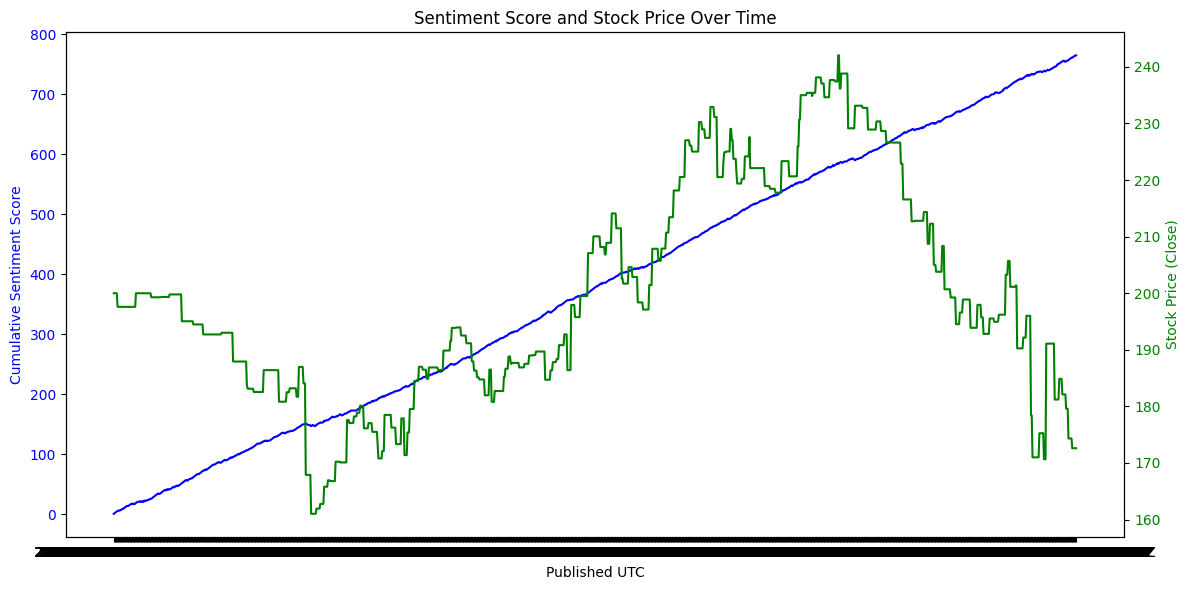

In [3]:
# Visualization with stock price

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot cumulative sentiment score
ax1.plot(df['published_utc'], df['cumulative_sentiment'], label='Cumulative Sentiment Score', color='blue')
ax1.set_xlabel('Published UTC')
ax1.set_ylabel('Cumulative Sentiment Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for stock price
ax2 = ax1.twinx()
ax2.plot(df['published_utc'], df['close'], label='Stock Price', color='green')
ax2.set_ylabel('Stock Price (Close)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and adjust layout
plt.title('Sentiment Score and Stock Price Over Time')
fig.tight_layout()
plt.show()

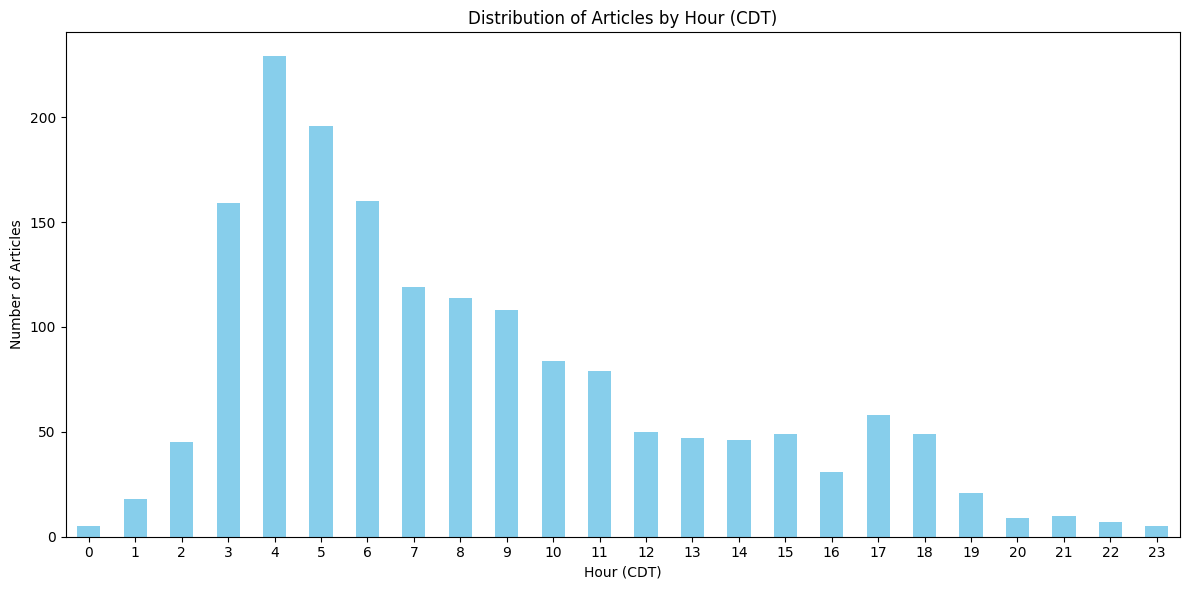

In [ ]:
# Visualization

# Convert 'published_utc' to datetime and adjust to CDT (Central Daylight Time)
df['published_utc'] = pd.to_datetime(df['published_utc'])
df['published_cdt'] = df['published_utc'] - pd.Timedelta(hours=5)  # CDT is UTC-5

# Extract the hour in CDT
df['hour_cdt'] = df['published_cdt'].dt.hour

# Plot the distribution of articles by hour in CDT
plt.figure(figsize=(12, 6))
df['hour_cdt'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour (CDT)')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Hour (CDT)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

,ticker,published_utc,publisher,title,sentiment,sentiment_reasoning,sentiment_score,cumulative_sentiment,hour,published_cdt,hour_cdt
0,AMZN,2024-07-02 17:46:57+00:00,GlobeNewswire Inc.,No-Code AI Platform Market Is Expected To Reac...,positive,AWS is mentioned as one of the biggest names i...,1,1,17,2024-07-02 12:46:57+00:00,12
1,AMZN,2024-07-02 19:16:19+00:00,Benzinga,"Apple, Microsoft, Amazon Shares Soar To New Al...",positive,Investors are starting to understand Amazon's ...,1,2,19,2024-07-02 14:16:19+00:00,14
2,AMZN,2024-07-02 20:14:53+00:00,Benzinga,July Retail Promotions Historically Boost Stoc...,positive,"Amazon, which offers Prime Day sales in mid-Ju...",1,3,20,2024-07-02 15:14:53+00:00,15
3,AMZN,2024-07-02 20:15:43+00:00,Benzinga,"Nasdaq 100 Notches Record Daily Close, Boosted...",positive,Amazon's stock price reached a fresh all-time ...,1,4,20,2024-07-02 15:15:43+00:00,15
4,AMZN,2024-07-02 20:38:27+00:00,Investing.com,Stifel: Retail giants' accelerating control of...,positive,Amazon has been responsible for 11% of US groc...,1,5,20,2024-07-02 15:38:27+00:00,15
...,...,...,...,...,...,...,...,...,...,...,...
1700,AMZN,2025-04-18 10:11:00+00:00,The Motley Fool,5 Warren Buffett Stocks You Can Buy Right Now ...,positive,Amazon is one of the Berkshire Hathaway stocks...,1,1011,10,2025-04-18 05:11:00+00:00,5
1701,AMZN,2025-04-18 11:45:00+00:00,The Motley Fool,The Best Warren Buffett Stocks to Buy With $60...,positive,The article highlights Amazon's AWS division a...,1,1012,11,2025-04-18 06:45:00+00:00,6
1702,AMZN,2025-04-19 08:46:55+00:00,Benzinga,Italy Joins US To Oppose 'Discriminatory' Digi...,positive,The article indicates that Italy's stance agai...,1,1013,8,2025-04-19 03:46:55+00:00,3
1703,AMZN,2025-04-19 09:10:00+00:00,The Motley Fool,Could Buying Nu Holdings Stock Today Set You U...,positive,The article draws a comparison between Nu Hold...,1,1014,9,2025-04-19 04:10:00+00:00,4
